In [1]:
import pandas as pd
import numpy as  np 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import plot, init_notebook_mode

# Initialize offline mode
init_notebook_mode(connected=True)



In [1]:
from data_prep import load_datasets, handle_missing_oil_data, merge_datasets
data_dir= '/Users/purvanshisharma/Desktop/CaseStudy/myenv/data'
holidays_events, oil, stores, transactions, train, test = load_datasets(data_dir)

In [3]:
 #Convert the 'date' column to datetime format
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
oil['date'] = pd.to_datetime(oil['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

# Check the structure of the data to verify
print(train.head())

   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0


In [37]:
# Finding null values in df_train
null_train = train.isnull().sum()

# Finding null values in df_test
null_test = test.isnull().sum()
null_stores= stores.isnull().sum()
null_holidays_events = holidays_events.isnull().sum()
null_oil= oil.isnull().sum()
null_transactions= transactions.isnull().sum()
# Display the results
#print("Null values in train:\n", null_train)
#print("\nNull values in test:\n", null_test)
#print("Null values in stores:\n", null_stores)
#print("\nNull values in holiday_events:\n", null_holidays_events)
print("Null values in oil:\n", null_oil)
print("\nNull values in transactions:\n", null_transactions)

Null values in oil:
 date          0
dcoilwtico    1
dtype: int64

Null values in transactions:
 date            0
store_nbr       0
transactions    0
dtype: int64


In [38]:
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='ffill')
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')
print(oil.head)

<bound method NDFrame.head of            date  dcoilwtico
0    2013-01-01       93.14
1    2013-01-02       93.14
2    2013-01-03       92.97
3    2013-01-04       93.12
4    2013-01-07       93.20
...         ...         ...
1213 2017-08-25       47.65
1214 2017-08-28       46.40
1215 2017-08-29       46.46
1216 2017-08-30       45.96
1217 2017-08-31       47.26

[1218 rows x 2 columns]>


/var/folders/0g/4sjc7czn17n4q8z0qxnnffs40000gn/T/ipykernel_406/2846260359.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/0g/4sjc7czn17n4q8z0qxnnffs40000gn/T/ipykernel_406/2846260359.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [2]:
# Merge datasets
train = train.merge(oil, on='date', how='left')
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')
train = train.merge(stores, on='store_nbr', how='left')

test = test.merge(oil, on='date', how='left')
test = test.merge(transactions, on=['date', 'store_nbr'], how='left')
test = test.merge(stores, on='store_nbr', how='left')
print(test)

              date  store_nbr  transactions  dcoilwtico       id  \
0       2013-01-01         25           770         NaN      561   
1       2013-01-01         25           770         NaN      562   
2       2013-01-01         25           770         NaN      563   
3       2013-01-01         25           770         NaN      564   
4       2013-01-01         25           770         NaN      565   
...            ...        ...           ...         ...      ...   
2755099 2017-08-15         54           802       47.57  3000751   
2755100 2017-08-15         54           802       47.57  3000752   
2755101 2017-08-15         54           802       47.57  3000753   
2755102 2017-08-15         54           802       47.57  3000754   
2755103 2017-08-15         54           802       47.57  3000755   

                             family    sales  onpromotion       city  \
0                        AUTOMOTIVE    0.000            0    Salinas   
1                         BABY CARE    

In [45]:
sales_over_time = train.groupby('date')['sales'].sum().reset_index()
print(sales_over_time)

           date          sales
0    2013-01-01    2511.618999
1    2013-01-02  496092.417944
2    2013-01-03  361461.231124
3    2013-01-04  354459.677093
4    2013-01-05  477350.121229
...         ...            ...
1679 2017-08-11  826373.722022
1680 2017-08-12  792630.535079
1681 2017-08-13  865639.677471
1682 2017-08-14  760922.406081
1683 2017-08-15  762661.935939

[1684 rows x 2 columns]


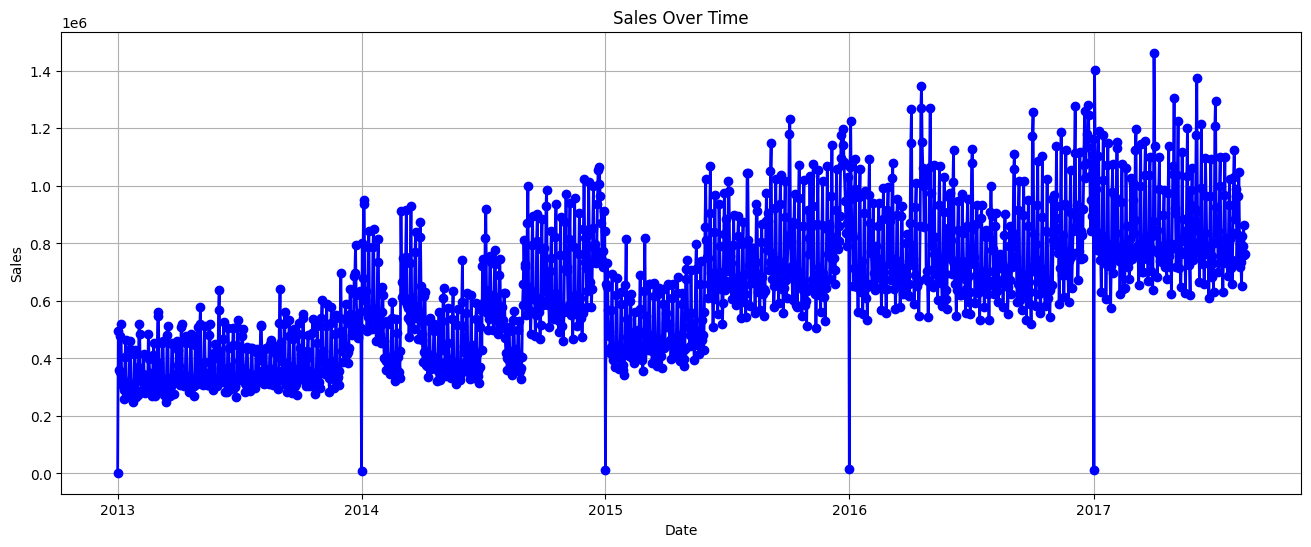

In [8]:
plt.figure(figsize=(16,6))
plt.plot(sales_over_time['date'], sales_over_time['sales'], color= 'b',marker='o', linestyle='-',linewidth= 2)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

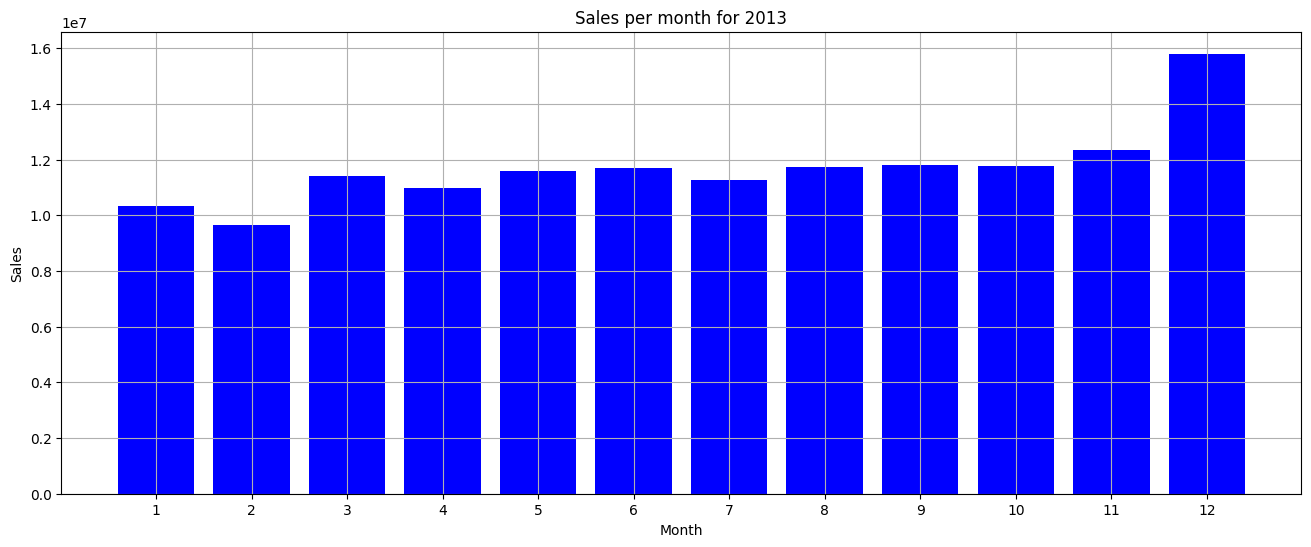

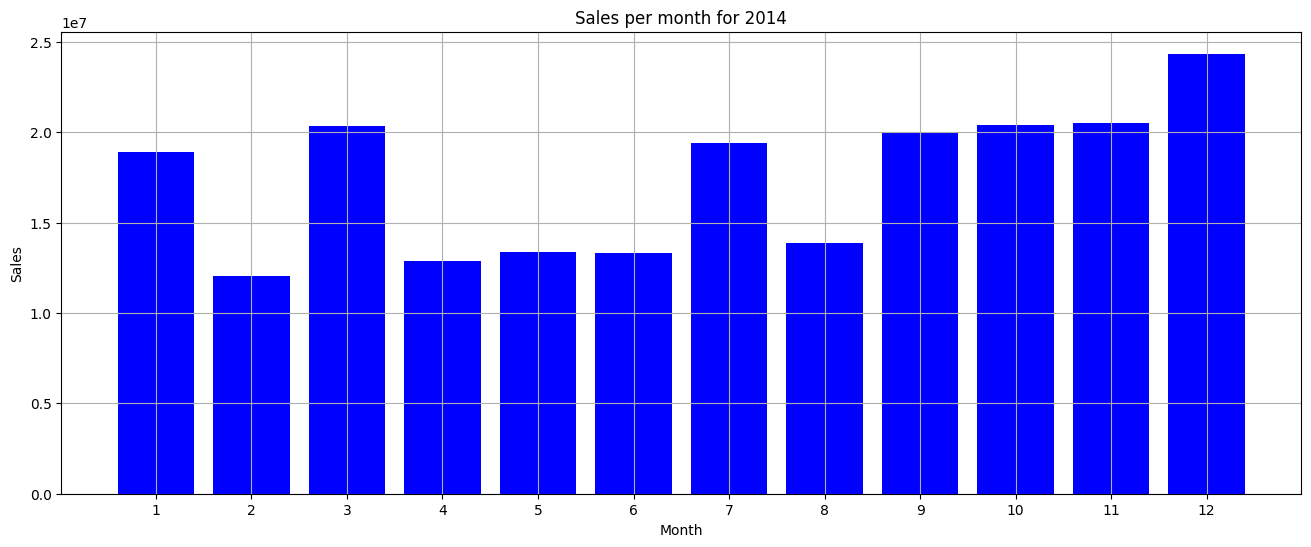

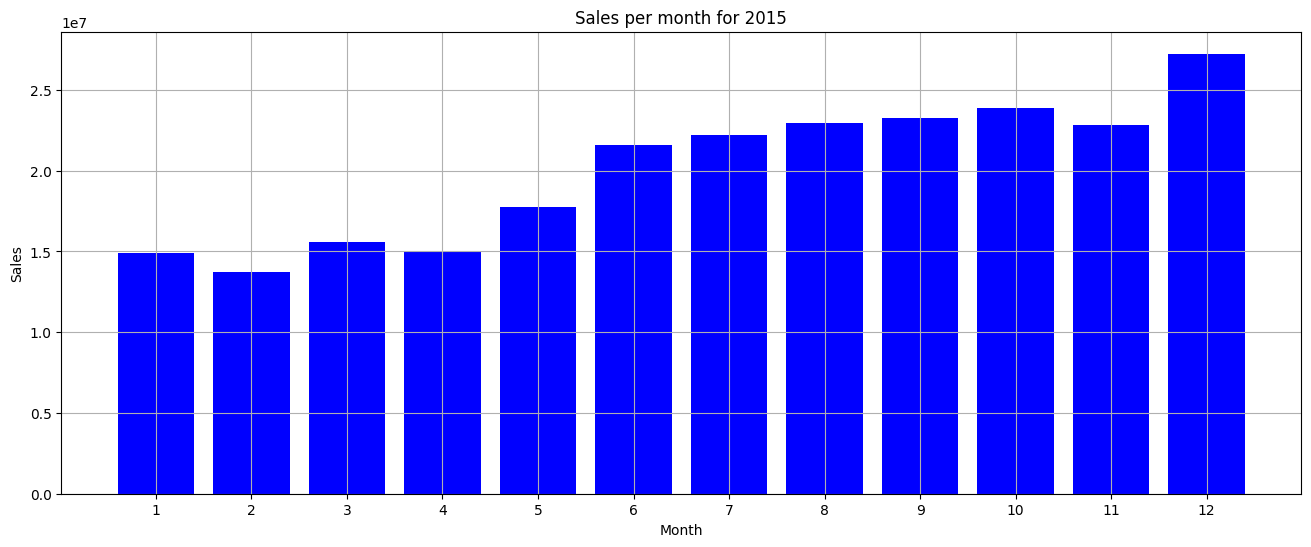

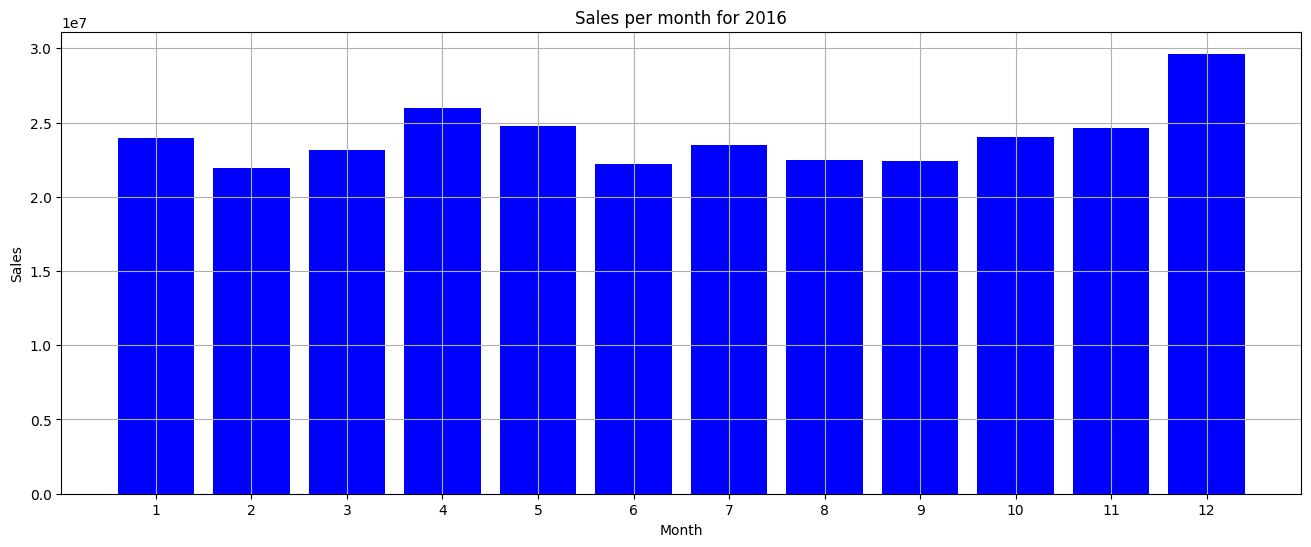

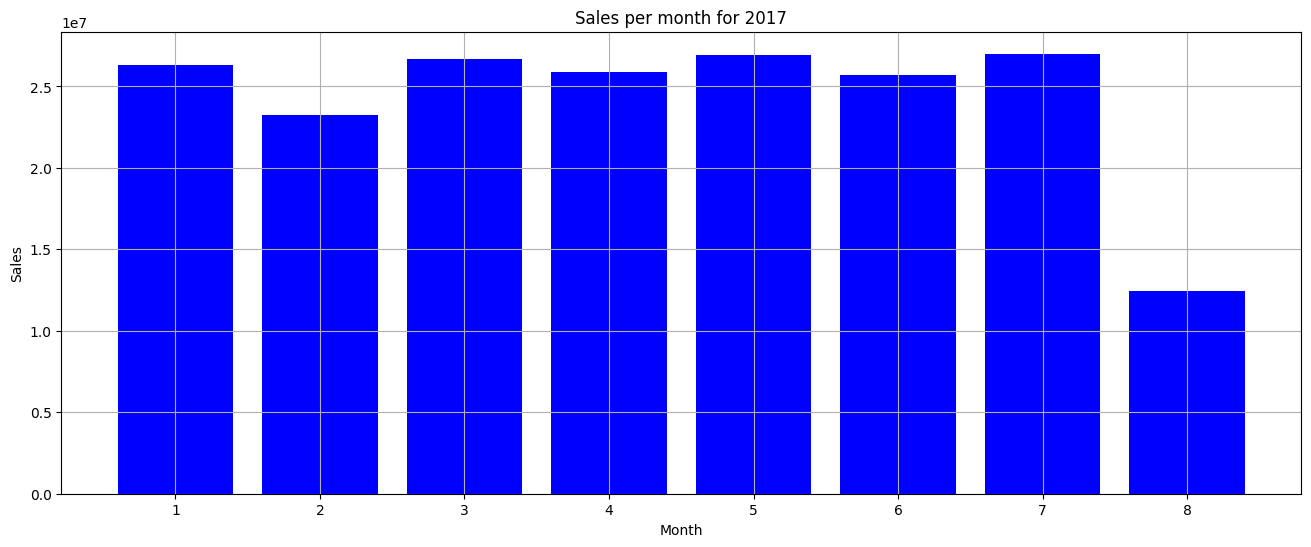

In [9]:
# Extract year and month
sales_over_time['year'] = sales_over_time['date'].dt.year
sales_over_time['month'] = sales_over_time['date'].dt.month

# Loop through each year and plot
for year in range(2013, 2018):  # Adjust range based on your data years
    # Filter data for the specific year
    monthly_sales = sales_over_time[sales_over_time['year'] == year].groupby('month')['sales'].sum()
    
    plt.figure(figsize=(16, 6))
    plt.bar(monthly_sales.index, monthly_sales.values, color='b')
    plt.title(f'Sales per month for {year}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.xticks(monthly_sales.index)  # Set x-ticks to be the month numbers
    plt.grid(True)
    plt.show()



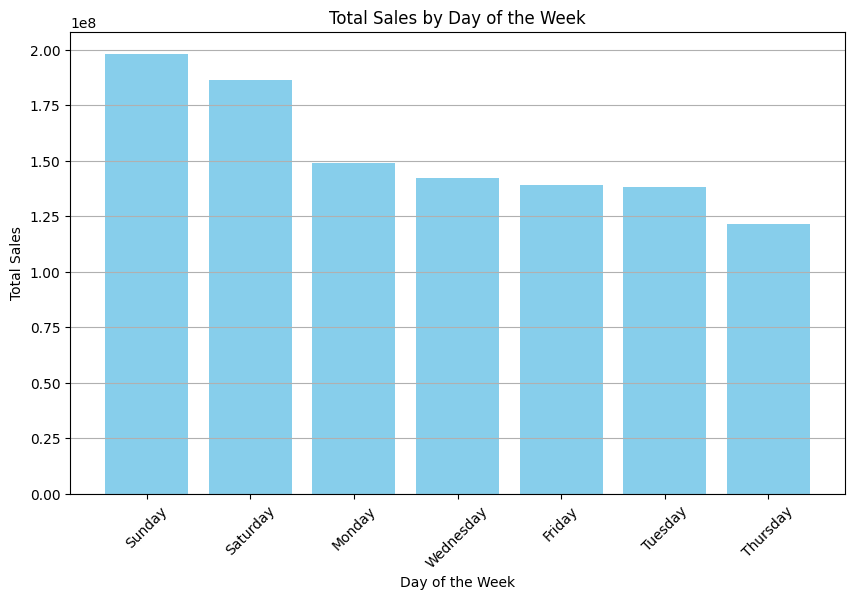

In [10]:
# Step 1: Extract the day of the week (0 = Monday, 6 = Sunday)
sales_over_time['day_of_week'] = sales_over_time['date'].dt.day_name()

# Step 2: Group by day of the week and sum the sales
sales_by_day = sales_over_time.groupby('day_of_week')['sales'].sum().reset_index()

# Step 3: Sort the results for better visualization
sales_by_day = sales_by_day.sort_values(by='sales', ascending=False)

# Step 4: Plot the sales by day of the week
plt.figure(figsize=(10, 6))
plt.bar(sales_by_day['day_of_week'], sales_by_day['sales'], color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/var/folders/0g/4sjc7czn17n4q8z0qxnnffs40000gn/T/ipykernel_406/1231262418.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



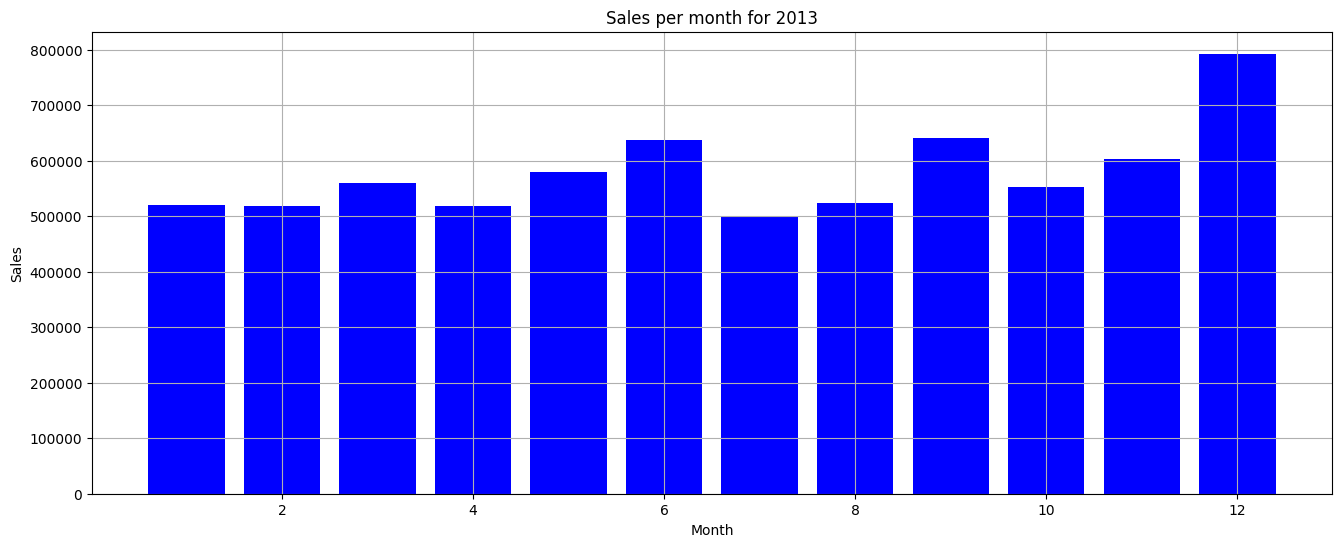

In [11]:
sales_2013 = sales_over_time[sales_over_time['date'].dt.year == 2013]
sales_2013['month']=sales_2013['date'].dt.month
plt.figure(figsize=(16,6))
plt.bar(sales_2013['month'], sales_2013['sales'], color= 'b')
plt.title('Sales per month for 2013')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

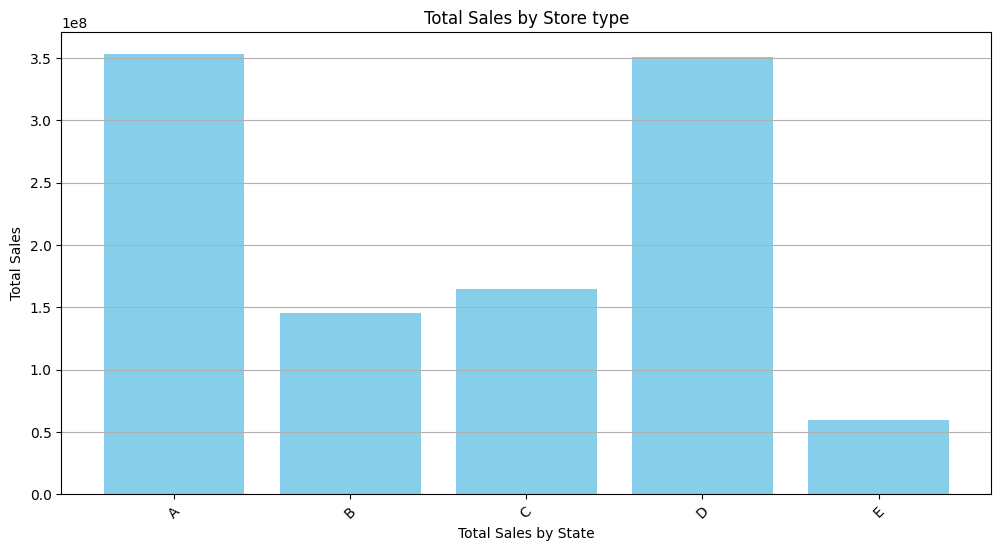

In [12]:

state_sales = train.groupby('type')['sales'].sum().reset_index()

# Rename columns for clarity
state_sales.columns = ['type', 'Total_Sales']

# Create a bar chart for total sales by state
plt.figure(figsize=(12, 6))
plt.bar(state_sales['type'], state_sales['Total_Sales'], color='skyblue')
plt.title('Total Sales by Store type')
plt.xlabel('Total Sales by State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate state names for better visibility
plt.grid(axis='y')
plt.show()

        date  dcoilwtico  sales
0 2013-01-01       93.14    0.0
1 2013-01-01       93.14    0.0
2 2013-01-01       93.14    0.0
3 2013-01-01       93.14    0.0
4 2013-01-01       93.14    0.0
5 2013-01-01       93.14    0.0
6 2013-01-01       93.14    0.0
7 2013-01-01       93.14    0.0
8 2013-01-01       93.14    0.0
9 2013-01-01       93.14    0.0


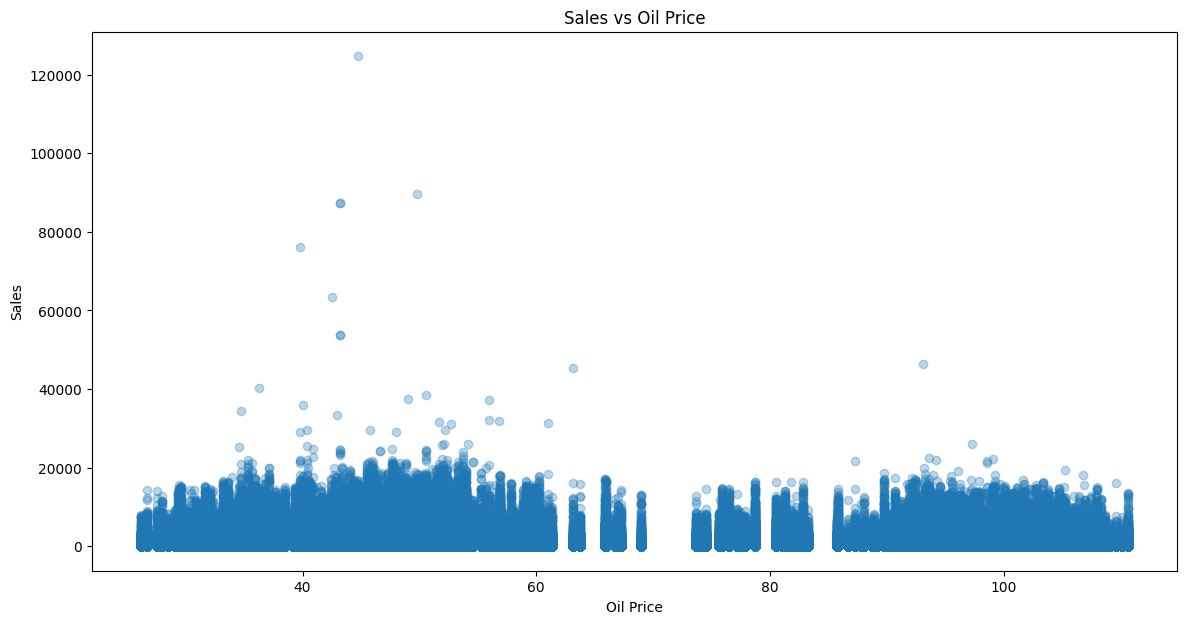

In [47]:

# Merge train data with oil prices
train_oil = pd.merge(train, oil[['date', 'dcoilwtico']], on='date', how='left')

# Handle missing values in 'dcoilwtico' by forward filling
train_oil['dcoilwtico'] = train_oil['dcoilwtico'].ffill()

# Print the first few rows to verify
print(train_oil[['date', 'dcoilwtico', 'sales']].head(10))

# Plot sales vs oil prices
plt.figure(figsize=(14, 7))
plt.scatter(train_oil['dcoilwtico'], train_oil['sales'], alpha=0.3)
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.title('Sales vs Oil Price')
plt.show()


/var/folders/0g/4sjc7czn17n4q8z0qxnnffs40000gn/T/ipykernel_406/1597298322.py:25: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



After merge, 'holiday_flag' columns: ['holiday_flag']
        date  holiday_flag  dcoilwtico
0 2013-01-01           1.0       93.14
1 2013-01-01           1.0       93.14
2 2013-01-01           1.0       93.14
3 2013-01-01           1.0       93.14
4 2013-01-01           1.0       93.14


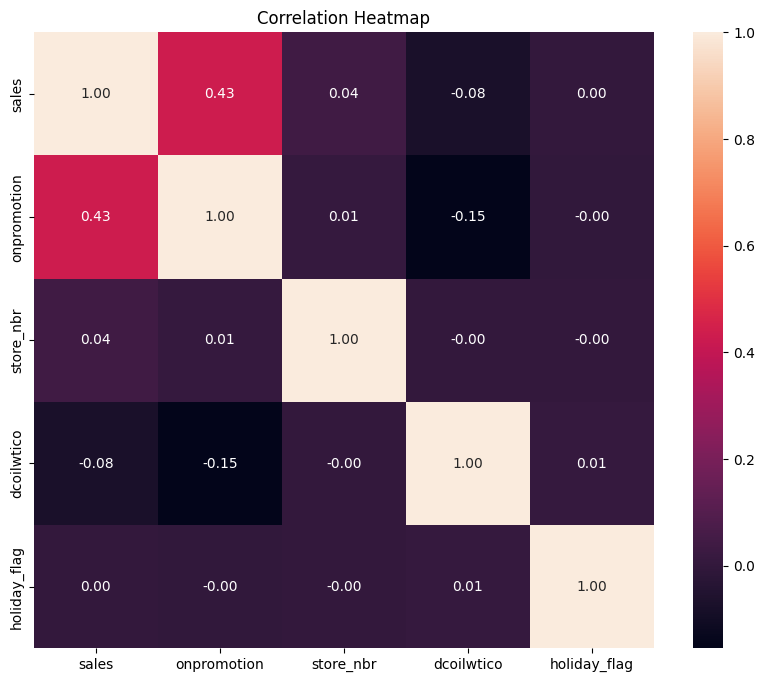

In [41]:
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])

# Check for existing 'holiday_flag' columns and remove them to avoid duplication
duplicate_columns = [col for col in train.columns if 'holiday_flag' in col]
if duplicate_columns:
    train = train.drop(columns=duplicate_columns)

# Create the 'holiday_flag' column to indicate holidays
holidays_events['holiday_flag'] = holidays_events['type'].apply(lambda x: 1 if x == 'Holiday' else 0)

# Handle transferred holidays: If a holiday was transferred, treat it as a regular day (set flag to 0)
holidays_events['holiday_flag'] = holidays_events.apply(lambda row: 0 if row['transferred'] == True else row['holiday_flag'], axis=1)
# Merge the 'holiday_flag' column from holidays into the train data on 'date'
train = pd.merge(train, holidays_events[['date', 'holiday_flag']], on='date', how='left')

# Fill missing values (for non-holiday days) with 0
train['holiday_flag'] = train['holiday_flag'].fillna(0)

# Merge the oil data into the train dataset on 'date'
train = pd.merge(train, oil[['date', 'dcoilwtico']], on='date', how='left')

# Fill missing oil prices with forward fill, since oil prices might not be available every day
train['dcoilwtico'] = train['dcoilwtico'].fillna(method='ffill')

# Ensure that only one 'holiday_flag' column exists
duplicate_columns = [col for col in train.columns if 'holiday_flag' in col]
print(f"After merge, 'holiday_flag' columns: {duplicate_columns}")
# Verify the merge worked correctly and 'holiday_flag' and 'dcoilwtico' exist in train data
print(train[['date', 'holiday_flag', 'dcoilwtico']].head())

# Select only the numeric columns for correlation analysis (including oil prices and holiday flag)
numeric_columns = train[['sales', 'onpromotion', 'store_nbr', 'dcoilwtico', 'holiday_flag']]

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
aggregated_sales = train.groupby([ 'family']).agg({'sales': 'sum'})

# Sorting the aggregated sales in descending order to find the top sales
sorted_sales = aggregated_sales.sort_values(by='sales', ascending=False)

# Selecting the top N entries with maximum sales
print(sorted_sales.head(5))
print(sorted_sales.tail(5))



                  sales
family                 
GROCERY I  3.508273e+08
BEVERAGES  2.216635e+08
PRODUCE    1.254480e+08
CLEANING   9.942102e+07
DAIRY      6.582360e+07
                    sales
family                   
MAGAZINES        273946.0
HARDWARE         105476.0
HOME APPLIANCES   42326.0
BABY CARE         10330.0
BOOKS              6540.0


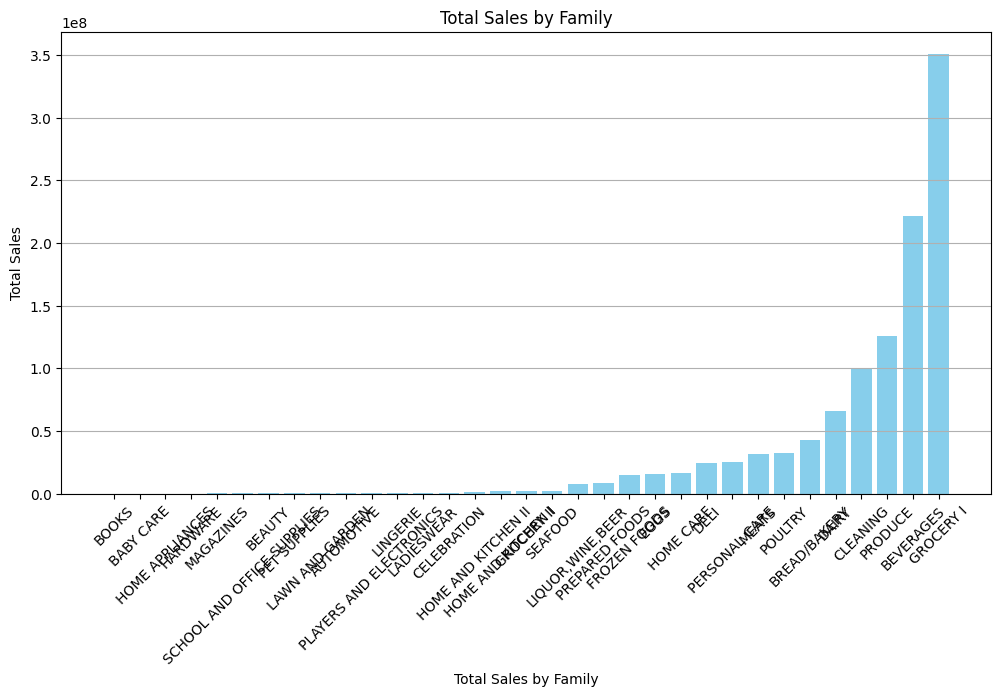

In [43]:
family_group = train.groupby('family')['sales'].sum().reset_index().sort_values(by='sales')

# Rename columns for clarity
family_group.columns = ['family', 'Total_Sales']


plt.figure(figsize=(12, 6))
plt.bar(family_group['family'], family_group['Total_Sales'], color='skyblue',)
plt.title('Total Sales by Family')
plt.xlabel('Total Sales by Family')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate state names for better visibility
plt.grid(axis='y')
plt.show()